# Benchmark function

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import datetime
import math
import sklearn.gaussian_process as gp
from scipy.stats import norm
from scipy.optimize import minimize
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
Benchmark_dim = 6

In [3]:
def Rosenbrock(s):
    X = 0
    Y = 0
    for i in range(0,Benchmark_dim-1):   
        sum_ = (s[i+1]-s[i]**2)**2
        X = X+sum_
    for i in range(0,Benchmark_dim):
        sum__ = (s[i]-1)**2
        Y = Y+sum__
    return 100*X+Y


def Sphere(s):
    X = 0
    for i in range(0,Benchmark_dim):
        sum_ = s[i]**2
        X = X+sum_
        
    return X


def Ackley(s):

    X = 0
    for i in range(0,Benchmark_dim):
        sum_ = s[i]**2
        X = X+sum_
    Y = 0
    for j in range(0,Benchmark_dim):
        sum__ = math.cos(2.0*math.pi*s[j])
        Y = Y+ sum__

    return -20 * math.exp(-0.2 * math.sqrt(X/ Benchmark_dim)) - math.exp(
        Y/ Benchmark_dim) + 20 + math.exp(1)


def Rastrigin(s):
    X = 0
    for i in range(0,Benchmark_dim):
        sum_ =10  + s[i]**2.0- 10*np.cos(2.0*np.pi*s[i])
        X = X +sum_
        
    return X


def Eggcrate(s):

    X = 0
    Y = 0
    for i in range(0,Benchmark_dim):
        sum_ = s[i]**2
        X = X+sum_
    for i in range(0,Benchmark_dim):    
        sum__ = 25*np.sin(s[i])**2
        Y = Y + sum__
    return X+Y


def Griewank(s):

    X = 0
    Y = 1
    
    for i in range(0,Benchmark_dim):
        sum_  = 1/4000*(s[i]**2)
        X = X+sum_
    for i in range(0,Benchmark_dim):
        sum__ = -1*math.cos(s[j]/math.sqrt(i+1))
        Y = Y*sum__
    return 1+X+Y
        


# Cuckoo Algorithm

In [4]:
import math
import numpy 
import random
import matplotlib.pyplot as plt

def get_cuckoos(nest, best, lb, ub, n, dim):
    
    tempnest = numpy.zeros((n,dim))
    tempnest = numpy. array(nest)
    
    beta = 3/2
    sigma = (math.gamma(1+beta)*math.sin(math.pi*beta/2)/(math.gamma((1+beta)/2)*beta*2**((beta-1)/2)))**(1/beta)
    s=numpy.zeros(dim)
    for j in range(0,n):
        s=nest[j,:]
        u=numpy.random.randn(len(s))*sigma
        v = numpy.random.randn(len(s))
        step = u/abs(v)**(1/beta)
        
        stepsize = 0.01*(step*(s-best))
        s=s+stepsize*numpy.random.randn(len(s))
        
        tempnest[j,:] = numpy.clip(s, lb, ub)
    return tempnest

def get_best_nest(nest, newnest, fitness, n, dim, objf):
    tempnest = numpy.zeros((n, dim))
    tempnest = numpy.copy(nest)
    for j in range(0,n):
        to_obj = newnest[j, :]
        fnew = objf(to_obj)
        
        if fnew<=fitness[j]:
            fitness[j] =fnew
            tempnest[j,:]=newnest[j, :]
    fmin = min(fitness)
    K=numpy.argmin(fitness)
    bestlocal = tempnest[K, :]
    return fmin, bestlocal, tempnest, fitness



def empty_nests(nest, pa, n, dim):
    tempnest= numpy.zeros((n,dim))
    K=numpy.random.uniform(0,1,(n,dim))>pa
    stepsize = random.random()*(nest[numpy.random.permutation(n),:]-nest[numpy.random.permutation(n),:])
    tempnest=nest+stepsize*K
    return tempnest

def CS(objf, lb, ub, dim, n, N_IterTotal):
    pa = 0.25
    nd = dim
    convergence =[]
    nest= numpy.random.rand(n,dim)*(ub-lb)+lb
    new_nest = numpy.zeros((n,dim))
    new_nest = numpy.copy(nest)
    bestnest = [0]*dim
    fitness = numpy.zeros(n)
    fitness.fill(float("inf"))
    fmin, bestnest, nest, fitness = get_best_nest(nest, new_nest, fitness, n, dim, objf)
    convergence = []
    for iter in range(0, N_IterTotal):
        new_nest = get_cuckoos(nest, bestnest, lb, ub, n, dim)
        fnew, best, nest, fitness = get_best_nest(nest, new_nest, fitness, n, dim, objf)
        new_nest = empty_nests(new_nest, pa, n, dim)
        fnew, best, nest, fitness= get_best_nest(nest, new_nest, fitness, n, dim, objf)
        if fnew<fmin:
            fmin=fnew
            bestnest = best
        if (iter==N_IterTotal-1):
            print('Best position is')
            print(str(bestnest))
            print('Best solution is')
            print(str(fmin))

        convergence.append(fmin)  
    xdata = np.arange(0,N_IterTotal, step = 1)
    plt.title('Cuckoo Search')
    plt.xlabel('Iteration')
    plt.ylabel('objective function')
    plt.plot(xdata, convergence)
    plt.show()
    return fmin, bestnest, convergence



Best position is
[0.00126113 0.         0.         0.         0.         0.00579631]
Best solution is
3.518761028240034e-05


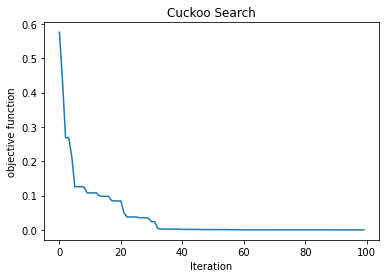

In [5]:
Cuckoo = CS(Sphere,0, 1, 6, 25, 100) 

# PSO


Rooy, N., particle-swarm-optimization https://github.com/nathanrooy/particle-swarm-optimization


In [6]:
from random import random
from random import uniform
import matplotlib.pyplot as plt
#--- MAIN ---------------------------------------------------------------------+

class Particle:
    def __init__(self, x0):
        self.position_i=[]          # particle position
        self.velocity_i=[]          # particle velocity
        self.pos_best_i=[]          # best position individual
        self.err_best_i=-1          # best error individual
        self.err_i=-1               # error individual
        self.err_total = []
        for i in range(0,num_dimensions):
            self.velocity_i.append(uniform(-1,1))
            self.position_i.append(x0[i])
    # evaluate current fitness
    def evaluate(self,costFunc):
        self.err_i=costFunc(self.position_i)
        # check to see if the current position is an individual best
        if self.err_i<self.err_best_i or self.err_best_i==-1:
            self.pos_best_i=self.position_i.copy()
            self.err_best_i=self.err_i
                           
    # update new particle velocity
    def update_velocity(self,pos_best_g):
        w=0.5       # constant inertia weight (how much to weigh the previous velocity)
        c1=1        # cognative constant
        c2=2        # social constant
        
        for i in range(0,num_dimensions):
            r1=random()
            r2=random()
            
            vel_cognitive=c1*r1*(self.pos_best_i[i]-self.position_i[i])
            vel_social=c2*r2*(pos_best_g[i]-self.position_i[i])
            self.velocity_i[i]=w*self.velocity_i[i]+vel_cognitive+vel_social

    # update the particle position based off new velocity updates
    def update_position(self,bounds):
        for i in range(0,num_dimensions):
            self.position_i[i]=self.position_i[i]+self.velocity_i[i]
            
            # adjust maximum position if necessary
            if self.position_i[i]>bounds[i][1]:
                self.position_i[i]=bounds[i][1]

            # adjust minimum position if neseccary
            if self.position_i[i]<bounds[i][0]:
                self.position_i[i]=bounds[i][0]
        
        
def minimize(costFunc,x0, bounds, num_particles, maxiter, verbose=False):
    global num_dimensions
#     x0 = np.random.rand(dim,num_particles)*(ub-lb)+lb
    num_dimensions= x0.shape[1]
    err_best_g=-1                   # best error for group
    pos_best_g=[]                   # best position for group

    # establish the swarm
    swarm=[]
    for i in range(0,num_particles):
        swarm.append(Particle(x0[i]))
    # begin optimization loop
    x=  []
    y  = [] 
    i=0
#     num  = 0
    while i<maxiter:

        verbose: print(f'iter: {i:>4d}, best solution: {err_best_g:12f}')            
        # cycle through particles in swarm and evaluate fitness
        for j in range(0,num_particles):
            swarm[j].evaluate(costFunc)

            # determine if current particle is the best (globally)
            if swarm[j].err_i<err_best_g or err_best_g==-1:
                pos_best_g=list(swarm[j].position_i)
                err_best_g=float(swarm[j].err_i)

        # cycle through swarm and update velocities and position
        for j in range(0,num_particles):
            swarm[j].update_velocity(pos_best_g)
            swarm[j].update_position(bounds)
        i+=1
        x.append(i)
        y.append(err_best_g)
        

    # print final results
    if verbose:
        print('Best position is')
        print(f'   > {pos_best_g}')
        print('Best solution is')
        print(f'   > {err_best_g}')
        plt.title('Particle Swarm Optimization')
        plt.xlabel('Iteration')
        plt.ylabel('objective function')
        plt.plot(x,y)
        plt.show()
    return err_best_g, pos_best_g, x, y

Best position is
   > [0, 0, 0, 0, 0, 0]
Best solution is
   > 0.0


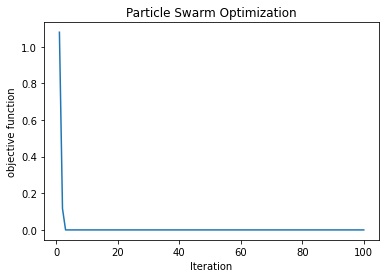

In [7]:
ub = 1
lb = 0
pop_size = 25
n_dim = 6
Iteration = 100


x0 = np.random.rand(pop_size,n_dim)*(ub)-lb
bounds = [(lb,ub)]*n_dim
PSO= minimize(Sphere, x0, bounds, pop_size, Iteration, verbose= True)

# Genetic Algorithm

Solgi, R. M., Geneticalgorithm https://github.com/rmsolgi/geneticalgorithm (2020).

In [8]:
import numpy as np
import sys
import time
from func_timeout import func_timeout, FunctionTimedOut
import matplotlib.pyplot as plt

###############################################################################
###############################################################################
###############################################################################

class geneticalgorithm():
    
    #############################################################
    def __init__(self, function, dimension, variable_type='bool', \
                 variable_boundaries=None,\
                 variable_type_mixed=None, \
                 function_timeout=10,\
                 algorithm_parameters={'max_num_iteration': None,\
                                       'population_size':100,\
                                       'mutation_probability':0.1,\
                                       'elit_ratio': 0.01,\
                                       'crossover_probability': 0.5,\
                                       'parents_portion': 0.3,\
                                       'crossover_type':'uniform',\
                                       'max_iteration_without_improv':None},\
                     convergence_curve=True,\
                         progress_bar=True):


        self.__name__=geneticalgorithm
        #############################################################
        # input function
        assert (callable(function)),"function must be callable"     
        
        self.f=function
        #############################################################
        #dimension
        
        self.dim=int(dimension)
        
        #############################################################
        # input variable type
        
        assert(variable_type=='bool' or variable_type=='int' or\
               variable_type=='real'), \
               "\n variable_type must be 'bool', 'int', or 'real'"
       #############################################################
        # input variables' type (MIXED)     

        if variable_type_mixed is None:
            
            if variable_type=='real': 
                self.var_type=np.array([['real']]*self.dim)
            else:
                self.var_type=np.array([['int']]*self.dim)            

 
        else:
            assert (type(variable_type_mixed).__module__=='numpy'),\
            "\n variable_type must be numpy array"  
            assert (len(variable_type_mixed) == self.dim), \
            "\n variable_type must have a length equal dimension."       

            for i in variable_type_mixed:
                assert (i=='real' or i=='int'),\
                "\n variable_type_mixed is either 'int' or 'real' "+\
                "ex:['int','real','real']"+\
                "\n for 'boolean' use 'int' and specify boundary as [0,1]"
                

            self.var_type=variable_type_mixed
        #############################################################
        # input variables' boundaries 

            
        if variable_type!='bool' or type(variable_type_mixed).__module__=='numpy':
                       
            assert (type(variable_boundaries).__module__=='numpy'),\
            "\n variable_boundaries must be numpy array"
        
            assert (len(variable_boundaries)==self.dim),\
            "\n variable_boundaries must have a length equal dimension"        
        
        
            for i in variable_boundaries:
                assert (len(i) == 2), \
                "\n boundary for each variable must be a tuple of length two." 
                assert(i[0]<=i[1]),\
                "\n lower_boundaries must be smaller than upper_boundaries [lower,upper]"
            self.var_bound=variable_boundaries
        else:
            self.var_bound=np.array([[0,1]]*self.dim)
 
        ############################################################# 
        #Timeout
        self.funtimeout=float(function_timeout)
        ############################################################# 
        #convergence_curve
        if convergence_curve==True:
            self.convergence_curve=True
        else:
            self.convergence_curve=False
        ############################################################# 
        #progress_bar
        if progress_bar==True:
            self.progress_bar=True
        else:
            self.progress_bar=False
        ############################################################# 
        ############################################################# 
        # input algorithm's parameters
        
        self.param=algorithm_parameters
        
        self.pop_s=int(self.param['population_size'])
        
        assert (self.param['parents_portion']<=1\
                and self.param['parents_portion']>=0),\
        "parents_portion must be in range [0,1]" 
        
        self.par_s=int(self.param['parents_portion']*self.pop_s)
        trl=self.pop_s-self.par_s
        if trl % 2 != 0:
            self.par_s+=1
               
        self.prob_mut=self.param['mutation_probability']
        
        assert (self.prob_mut<=1 and self.prob_mut>=0), \
        "mutation_probability must be in range [0,1]"
        
        
        self.prob_cross=self.param['crossover_probability']
        assert (self.prob_cross<=1 and self.prob_cross>=0), \
        "mutation_probability must be in range [0,1]"
        
        assert (self.param['elit_ratio']<=1 and self.param['elit_ratio']>=0),\
        "elit_ratio must be in range [0,1]"                
        
        trl=self.pop_s*self.param['elit_ratio']
        if trl<1 and self.param['elit_ratio']>0:
            self.num_elit=1
        else:
            self.num_elit=int(trl)
            
        assert(self.par_s>=self.num_elit), \
        "\n number of parents must be greater than number of elits"
        
        if self.param['max_num_iteration']==None:
            self.iterate=0
            for i in range (0,self.dim):
                if self.var_type[i]=='int':
                    self.iterate+=(self.var_bound[i][1]-self.var_bound[i][0])*self.dim*(100/self.pop_s)
                else:
                    self.iterate+=(self.var_bound[i][1]-self.var_bound[i][0])*50*(100/self.pop_s)
            self.iterate=int(self.iterate)
            if (self.iterate*self.pop_s)>10000000:
                self.iterate=10000000/self.pop_s
        else:
            self.iterate=int(self.param['max_num_iteration'])
        
        self.c_type=self.param['crossover_type']
        assert (self.c_type=='uniform' or self.c_type=='one_point' or\
                self.c_type=='two_point'),\
        "\n crossover_type must 'uniform', 'one_point', or 'two_point' Enter string" 
        
        
        self.stop_mniwi=False
        if self.param['max_iteration_without_improv']==None:
            self.mniwi=self.iterate+1
        else: 
            self.mniwi=int(self.param['max_iteration_without_improv'])

        
        ############################################################# 
    def run(self):
        
        
        ############################################################# 
        # Initial Population
        
        self.integers=np.where(self.var_type=='int')
        self.reals=np.where(self.var_type=='real')
        
        
        
        pop=np.array([np.zeros(self.dim+1)]*self.pop_s)
        solo=np.zeros(self.dim+1)
        var=np.zeros(self.dim)       
        
        for p in range(0,self.pop_s):
         
            for i in self.integers[0]:
                var[i]=np.random.randint(self.var_bound[i][0],\
                        self.var_bound[i][1]+1)  
                solo[i]=var[i].copy()
            for i in self.reals[0]:
                var[i]=self.var_bound[i][0]+np.random.random()*\
                (self.var_bound[i][1]-self.var_bound[i][0])    
                solo[i]=var[i].copy()


            obj=self.sim(var) 
            
            solo[self.dim]=obj
            pop[p]=solo.copy()
        #############################################################

        #############################################################
        # Report
        self.report=[]
        self.test_obj=obj
        self.best_variable=var.copy()
        self.best_function=obj
        ##############################################################   
                        
        t=1
        counter=0
        ydata = []
        while t<=self.iterate:
            
            if self.progress_bar==True:
                self.progress(t,self.iterate,status="GA is running...")
            #############################################################
            #Sort
            
            pop = pop[pop[:,self.dim].argsort()]

            if pop[0,self.dim]<self.best_function:
                counter=0
                self.best_function=pop[0,self.dim].copy()
                self.best_variable=pop[0,: self.dim].copy()
            else:
                counter+=1
            #############################################################
            # Report

            self.report.append(pop[0,self.dim])
    
            ##############################################################         
            # Normalizing objective function 
            
            normobj=np.zeros(self.pop_s)
            
            minobj=pop[0,self.dim]
            if minobj<0:
                normobj=pop[:,self.dim]+abs(minobj)
                
            else:
                normobj=pop[:,self.dim].copy()
    
            maxnorm=np.amax(normobj)
            normobj=maxnorm-normobj+1

            #############################################################        
            # Calculate probability
            
            sum_normobj=np.sum(normobj)
            prob=np.zeros(self.pop_s)
            prob=normobj/sum_normobj
            cumprob=np.cumsum(prob)
  
            #############################################################        
            # Select parents
            par=np.array([np.zeros(self.dim+1)]*self.par_s)
            
            for k in range(0,self.num_elit):
                par[k]=pop[k].copy()
            for k in range(self.num_elit,self.par_s):
                index=np.searchsorted(cumprob,np.random.random())
                par[k]=pop[index].copy()
                
            ef_par_list=np.array([False]*self.par_s)
            par_count=0
            while par_count==0:
                for k in range(0,self.par_s):
                    if np.random.random()<=self.prob_cross:
                        ef_par_list[k]=True
                        par_count+=1
                 
            ef_par=par[ef_par_list].copy()
    
            #############################################################  
            #New generation
            pop=np.array([np.zeros(self.dim+1)]*self.pop_s)
            
            for k in range(0,self.par_s):
                pop[k]=par[k].copy()
                
            for k in range(self.par_s, self.pop_s, 2):
                r1=np.random.randint(0,par_count)
                r2=np.random.randint(0,par_count)
                pvar1=ef_par[r1,: self.dim].copy()
                pvar2=ef_par[r2,: self.dim].copy()
                
                ch=self.cross(pvar1,pvar2,self.c_type)
                ch1=ch[0].copy()
                ch2=ch[1].copy()
                
                ch1=self.mut(ch1)
                ch2=self.mutmidle(ch2,pvar1,pvar2)               
                solo[: self.dim]=ch1.copy()                
                obj=self.sim(ch1)
                solo[self.dim]=obj
                pop[k]=solo.copy()                
                solo[: self.dim]=ch2.copy()                
                obj=self.sim(ch2)               
                solo[self.dim]=obj
                pop[k+1]=solo.copy()
        #############################################################       
            t+=1
            if counter > self.mniwi:
                pop = pop[pop[:,self.dim].argsort()]
                if pop[0,self.dim]>=self.best_function:
                    t=self.iterate
                    if self.progress_bar==True:
                        self.progress(t,self.iterate,status="GA is running...")
                    time.sleep(2)
                    t+=1
                    self.stop_mniwi=True
                
        #############################################################
        #Sort
        pop = pop[pop[:,self.dim].argsort()]
        if pop[0,self.dim]<self.best_function:
                
            self.best_function=pop[0,self.dim].copy()
            self.best_variable=pop[0,: self.dim].copy()
        #############################################################
        # Report
        
        self.report.append(pop[0,self.dim])
        
        
 
        
        self.output_dict={'variable': self.best_variable, 'function':\
                          self.best_function}
        if self.progress_bar==True:
            show=' '*100
            sys.stdout.write('\r%s' % (show))
        sys.stdout.write('\r Best position is\n %s' % (self.best_variable))
        sys.stdout.write('\n\n Best solution is \n %s\n' % (self.best_function))
        sys.stdout.flush() 
        re=np.array(self.report)
        if self.convergence_curve==True:
            plt.plot(re)
            plt.xlabel('Iteration')
            plt.ylabel('Objective function')
            plt.title('Genetic Algorithm')
            plt.show()
#             print(re)
            return re
        if self.stop_mniwi==True:
            sys.stdout.write('\nWarning: GA is terminated due to the'+\
                             ' maximum number of iterations without improvement was met!')
        
##############################################################################         
##############################################################################         
    def cross(self,x,y,c_type):
         
        ofs1=x.copy()
        ofs2=y.copy()
        

        if c_type=='one_point':
            ran=np.random.randint(0,self.dim)
            for i in range(0,ran):
                ofs1[i]=y[i].copy()
                ofs2[i]=x[i].copy()
  
        if c_type=='two_point':
                
            ran1=np.random.randint(0,self.dim)
            ran2=np.random.randint(ran1,self.dim)
                
            for i in range(ran1,ran2):
                ofs1[i]=y[i].copy()
                ofs2[i]=x[i].copy()
            
        if c_type=='uniform':
                
            for i in range(0, self.dim):
                ran=np.random.random()
                if ran <0.5:
                    ofs1[i]=y[i].copy()
                    ofs2[i]=x[i].copy() 
                   
        return np.array([ofs1,ofs2])
###############################################################################  
    
    def mut(self,x):
        
        for i in self.integers[0]:
            ran=np.random.random()
            if ran < self.prob_mut:
                
                x[i]=np.random.randint(self.var_bound[i][0],\
                 self.var_bound[i][1]+1) 
                    
        

        for i in self.reals[0]:                
            ran=np.random.random()
            if ran < self.prob_mut:   

               x[i]=self.var_bound[i][0]+np.random.random()*\
                (self.var_bound[i][1]-self.var_bound[i][0])    
            
        return x
###############################################################################
    def mutmidle(self, x, p1, p2):
        for i in self.integers[0]:
            ran=np.random.random()
            if ran < self.prob_mut:
                if p1[i]<p2[i]:
                    x[i]=np.random.randint(p1[i],p2[i])
                elif p1[i]>p2[i]:
                    x[i]=np.random.randint(p2[i],p1[i])
                else:
                    x[i]=np.random.randint(self.var_bound[i][0],\
                 self.var_bound[i][1]+1)
                        
        for i in self.reals[0]:                
            ran=np.random.random()
            if ran < self.prob_mut:   
                if p1[i]<p2[i]:
                    x[i]=p1[i]+np.random.random()*(p2[i]-p1[i])  
                elif p1[i]>p2[i]:
                    x[i]=p2[i]+np.random.random()*(p1[i]-p2[i])
                else:
                    x[i]=self.var_bound[i][0]+np.random.random()*\
                (self.var_bound[i][1]-self.var_bound[i][0]) 
        return x
###############################################################################     
    def evaluate(self):
        return self.f(self.temp)
###############################################################################    
    def sim(self,X):
        self.temp=X.copy()
        obj=None
        try:
            obj=func_timeout(self.funtimeout,self.evaluate)
        except FunctionTimedOut:
            print("given function is not applicable")
        assert (obj!=None), "After "+str(self.funtimeout)+" seconds delay "+\
                "func_timeout: the given function does not provide any output"
        return obj

###############################################################################
    def progress(self, count, total, status=''):
        bar_len = 50
        filled_len = int(round(bar_len * count / float(total)))

        percents = round(100.0 * count / float(total), 1)
        bar = '|' * filled_len + '_' * (bar_len - filled_len)

        sys.stdout.write('\r%s %s%s %s' % (bar, percents, '%', status))
        sys.stdout.flush()     

 Best position is                                                                                   
 [0.0174832  0.01760293 0.00428295 0.04280072 0.03553035 0.00190248]

 Best solution is 
 0.0037317959772933357


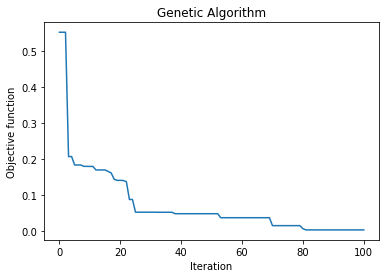

In [9]:
import numpy as np
import math
# from geneticalgorithm import geneticalgorithm as ga




varbound=np.array([[0,1]]*6)

algorithm_param = {'max_num_iteration': 100,\
                   'population_size':25,\
                   'mutation_probability':0.1,\
                   'elit_ratio': 0.01,\
                   'crossover_probability': 0.5,\
                   'parents_portion': 0.3,\
                   'crossover_type':'uniform',\
                   'max_iteration_without_improv':None}

model=geneticalgorithm(function=Sphere,\
            dimension=6,\
            variable_type='real',\
            variable_boundaries=varbound,\
            algorithm_parameters=algorithm_param)
a = model.run()


# Harmoney Search

In [10]:
import numpy as np
import math
import itertools
from collections import namedtuple, deque


Gen_Memory = namedtuple("Gen_Memory", ['Gen_name', 'x', 'y'])

def obj_(ndarray) -> float:
    obj = np.sum(ndarray, axis = 1)
    return obj

class Harmonic_Memory():
    def __init__(self, obj_Func, pop_size=25, n_dim=6, maxbd = 5 , minbd = -5):
        self.obj_Func = obj_Func
        self.pop_size = pop_size
        self.n_dim = n_dim
        self.maxbd = maxbd
        self.minbd = minbd
        
    def init(self):
        self.x = np.random.rand(self.pop_size, self.n_dim)*(self.maxbd-(self.minbd))+self.minbd
        return self.x
    
    def evaluate(self):
        """
        run the objective function and arranged by ascending/descending order.
        all the propertites should ---
        """
        self.y = []
        for j in range(0,self.x.shape[0]):
            to_obj = self.x[j, :]
            self.data = self.obj_Func(to_obj)
            self.y.append(self.data)
        self.y = np.array(self.y)           
        s = self.y.reshape(-1).argsort() ## minimize algorithm
        self.y = self.y[s[::-1]]
        self.x = self.x[s[::-1]]
        return self.x, self.y
    
    def update(self, cc):
        self.x[:-1,:] = self.x[1:,:]
        self.x[-1,:] = cc
        return self.x

In [11]:
objf = Sphere
pop_size=25
n_dim=6
Generation=100
ub = 1
lb = 0
n_dim = 6
HMCR = 0.7
PAR = 0.3
bw = 0.01

Best position is
[0.02961287 0.05800418 0.11418308 0.15148897 0.0680685  0.03951225]
Best solution is
0.09017853415892928


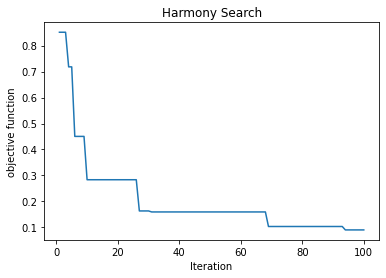

In [13]:

gen_memory = deque([])
HM = Harmonic_Memory(objf,pop_size,n_dim,ub,lb)
HM.init()
HM.evaluate()
bestdatanum = Generation-1
bestobjnum = pop_size-1
n = 0
Iter = []
ydata = []
for gen in range(Generation):
    n+=1
    Iter.append(n)
    for i in range(pop_size):
        x_c = np.copy(HM.x[0,:])

        for j in range(n_dim):
            r1 = np.random.uniform(0,1)
            if r1 < HMCR:
                ch = np.random.choice(HM.x[:,j])
                r2 = np.random.uniform(0,1)
                if r2 < PAR:
                    r3 = np.random.uniform(0,1)
                    r4 = np.random.uniform(0,1)
                    if r3 < 0.5:
                        x_c[j] = ch - r4*bw
                    else:
                        x_c[j] = ch + r4*bw
            else: # r1 > HMCR:
                x_c[j] = np.random.rand(1)    
            
        if HM.y[0] > obj_(x_c.reshape(1,-1)): #최소화\
            x_c = x_c
            HM.evaluate()
            HM.update(x_c)

        else:
            pass
    ydata.append(HM.y.min())    
#     print(HM.y.min())
    gen_memory.append(Gen_Memory("Gen{}".format(gen+1), HM.x, HM.y))



print("Best position is")
print(gen_memory[bestdatanum][1][bestobjnum])
print("Best solution is")
print(gen_memory[bestdatanum][2][bestobjnum])    

plt.title('Harmony Search')
plt.plot(Iter,ydata)
plt.xlabel('Iteration')
plt.ylabel('objective function')
plt.show()

# Bayesian Optimization

In [4]:

pop = 25
dim = 6
lowbd = -5
highbd = 5
objf = Sphere
Iteration = 100

In [5]:
bound = np.array([lowbd, highbd]).reshape(-1,2)
bounds = np.repeat(bound, repeats = dim,axis = 0)
input_X = np.random.rand(pop,dim)*(highbd-lowbd)+lowbd

x_0 = []
y_0 = []
for i in range(0,len(input_X)):
    a = objf(input_X[i,:]) #### Objective function
    y_0.append(a)
x_0 = input_X.tolist()

n_restarts=len(y_0)
n_restarts_=len(x_0)

In [6]:
def expected_improvement(x, gaussian_process, evaluated_loss, greater_is_better, n_params):
    x_to_predict = x.reshape(-1, n_params)
    mu, sigma = gaussian_process.predict(x_to_predict, return_std=True)

    if greater_is_better:
        loss_optimum = np.max(evaluated_loss)
    else:
        loss_optimum = np.min(evaluated_loss)

    scaling_factor = (-1) ** (not greater_is_better)

    with np.errstate(divide='ignore'):
        Z = scaling_factor * (mu - loss_optimum) / sigma
        expected_improvement = scaling_factor * (mu - loss_optimum) * norm.cdf(Z) + sigma * norm.pdf(Z)
        expected_improvement[sigma == 0.0] == 0.0
    return -1 * expected_improvement


def sample_next_hyperparameter(acquisition_func, gaussian_process, evaluated_loss, greater_is_better,
                              bounds, n_restarts=n_restarts):

    
    best_x = None
    best_acquisition_value = 1
    n_params = bounds.shape[0]

    for starting_point in np.random.uniform(bounds[:, 0], bounds[:, 1], size=(n_restarts, n_params)):

        res = minimize(fun=acquisition_func,
                        x0=starting_point.reshape(1, -1),
                        bounds=bounds,
                        method='L-BFGS-B',
                        args=(gaussian_process, evaluated_loss, greater_is_better, n_params))

        if res.fun < best_acquisition_value:
            best_acquisition_value = res.fun
            best_x = res.x
    return best_x



def bayesian_optimization(n_iters, bounds, x0, y0, n_pre_samples,
                         gp_params, random_search, alpha, epsilon):

    
    x_list = []
    y_list = []
    n_params = bounds.shape[0]
    
    if x0 is None:
        for params in np.random.uniform(bounds[:, 0], bounds[:, 1], (n_pre_samples, bounds.shape[0])):
            x_list.append(params)

    else:
        for params in x0:
            x_list.append(params)
        for params in y0:
            y_list.append(params)

    xp = np.array(x_list)
    yp = np.array(y_list)


    # Create the GP
    if gp_params is not None:
        model = gp.GaussianProcessRegressor(**gp_params)
    else:
        kernel = gp.kernels.Matern()
        model = gp.GaussianProcessRegressor(kernel=kernel,
                                                alpha=alpha,
                                                n_restarts_optimizer=10,
                                                normalize_y=True)

    next_sample = []
    for n in range(n_iters):

        model.fit(xp, yp)

        if random_search:
            x_random = np.random.uniform(bounds[:, 0], bounds[:, 1], size=(random_search, n_params))
            ei = -1 * expected_improvement(x_random, model, yp, greater_is_better=True, n_params=n_params)
            next_sample = x_random[np.argmax(ei), :]
        else:
            next_sample = sample_next_hyperparameter(expected_improvement, model, yp, greater_is_better=False, 
                                                     bounds=bounds, n_restarts=n_restarts)

        if np.any(np.abs(next_sample - xp) <= epsilon):
            next_sample = np.random.uniform(bounds[:, 0], bounds[:, 1], bounds.shape[0])
        b = list(next_sample)
    return b



C:\Users\Jinhee\anaconda3\lib\site-packages\sklearn\gaussian_process\_gpr.py:506: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\Jinhee\anaconda3\lib\site-packages\sklearn\gaussian_process\_gpr.py:506: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


=====================================   Finished !! ====================================================
Best Position is
[0.01116266]
Best Solution is
[ 0.05745832 -0.03892776 -0.05957835  0.02427346 -0.02256062 -0.04120763]


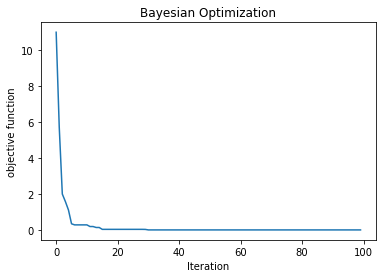

In [7]:

#=====================================================================================================
import matplotlib.pyplot as plt
%matplotlib inline


num=[0]
j=len(y_0)
x__=[]
y__=[]
k=0

while True:

    j+=1
    k+=1
    result = bayesian_optimization(n_iters=1, bounds=bounds, x0=x_0, y0=y_0, n_pre_samples=None,
                         gp_params=None, random_search=False, alpha=1e-5, epsilon=1e-7)
    num.append(k)
    x_0.append(result)
    
    s=np.array([result])
    aa=[]
    for i in range(s.shape[0]):
        x__.append(s[i])
        b = Sphere(s[i])
        aa.append(b)
    y_0.append(aa[0])
    y__.append(aa[0])
    plt.pause(1)

    if k >= Iteration:
        break
print('=====================================   Finished !! ====================================================')
x = np.array(x__)
y = np.array(y__).reshape(-1,1)
convergence = np.c_[x,y]
for i in range(0,Iteration): 
    try:
        if convergence[i][dim] < convergence[i+1][dim]:
            convergence[i+1] = convergence[i]
    except:
        pass
x= np.arange(0,Iteration,1)
  
print("Best Position is")
print(convergence[Iteration-1,-1:])
print("Best Solution is")
print(convergence[Iteration-1,:-1])
plt.title('Bayesian Optimization')
plt.xlabel('Iteration')
plt.ylabel('objective function')
plt.plot(x,convergence[:,6])  
plt.show()



# Deep Q Learning

In [41]:
tf.reset_default_graph()

start = datetime.datetime.now()

y = 0.9
rList = []
rListp = []
num_episodes = 1
length_episode = 10000
learning_rate = 0.01
e_init = 2
e_decay = 100
reso = 0.01
num = 5/reso + 1
n_qn1 = 32
n_qn2 = 64
n_qn3 = 32
digest = 10
dim = 6
pop_size = 25
obj= Rosenbrock

def env(s,a,step):
    reso_=reso*step
    f = obj(s[0])
    s1=s
    if a % 2 ==0:
        s1[0,a//2] += float(reso_.reshape(-1))
    elif a % 2 !=0:
        s1[0,a//2] -= float(reso_.reshape(-1))
    else: print('Warning!!! Wrong Action, a =',a)
    
    f1 = obj(s1[0])
    r=0.1
    if f1 - f > 0: r=-100
        
    for i in range(dim):
        if s1[0,i] < -5: s1[0,i] = -5.0
        if s1[0,i] > 5.0: s1[0,i] = 5.0
    
    return r,np.array(s1, dtype=float)

# Q-network
inp = tf.placeholder(tf.float32, [1,dim], name="state") 
w1 = tf.Variable(tf.random_normal([dim,n_qn1]))
b1 = tf.Variable(tf.random_normal([1,n_qn1]))
c1 = tf.nn.relu(tf.matmul(inp,w1)+b1)
w2 = tf.Variable(tf.random_normal([n_qn1,n_qn2]))
b2 = tf.Variable(tf.random_normal([1,n_qn2]))
c2 = tf.nn.relu(tf.matmul(c1,w2)+b2)
w3 = tf.Variable(tf.random_normal([n_qn2,n_qn3]))
b3 = tf.Variable(tf.random_normal([1,n_qn3]))
c3 = tf.nn.relu(tf.matmul(c2,w3)+b3)

wo = tf.Variable(tf.random_normal([n_qn3,2*dim]))  
bo = tf.Variable(tf.random_normal([1,2*dim])) 
wo_ = tf.Variable(tf.random_normal([n_qn3,1]))
bo_ = tf.Variable(tf.random_normal([1,1]))

Qout = tf.add(tf.matmul(c3,wo),bo,name="Qout")
Qout_ = tf.add(tf.matmul(c3,wo_),bo_,name="Qout")
amax = tf.argmax(Qout,1,name="amax")

step_next= tf.placeholder(tf.float32, [1,1])
nextQ = tf.placeholder(tf.float32, [1,dim*2])
loss = tf.reduce_sum(tf.square(nextQ - Qout)+tf.square(Qout_-step_next))
updateQnet = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss) 

init = tf.global_variables_initializer()
episode = []
cost = []
allcost = []
position = []
with tf.Session() as sess:
    saver = tf.train.Saver()
    sess.run(init)
        
    for i in range(num_episodes):
        #if i == 0:
        s=[]
        for aa in range(dim):
            s_= np.random.randint(-num,num)*reso
            s.append(s_)
        s= np.array([s]).reshape(1,dim)
        
        j = 0
        rAll = 0
        e = 1./((i/e_decay) + e_init)
        dd=1000000
        while j < length_episode:
            j+=1
            a,allQ,step = sess.run([amax,Qout,Qout_],feed_dict={inp:s})
            if np.random.rand(1) < e: a = np.random.randint(0,dim*2)  
            r,s1 = env(s,a,step)
            Q1, step_ = sess.run([Qout,Qout_],feed_dict={inp:s1})
            maxQ1 = np.max(Q1)
            targetQ = allQ
            targetQ[0,a] = r + y*maxQ1
            
            rn=np.random.randint(1,5)
            if j % rn == 0:
                _ = sess.run([updateQnet],feed_dict={inp:s,nextQ:targetQ, step_next:step_})
            
            rAll += r
            s = s1
            allcost.append(obj(s[0]))
            if obj(s[0])<dd:
                dd=obj(s[0])
                episode.append(j)
                cost.append(obj(s[0]))
                position.append(s)
             
            
print("Best postion is")
print(position[len(position)-1][0])
print("Best solution is")
print(dd)
plt.title("Deep Q-Learning")      
plt.xlabel('Iteration')
plt.ylabel('objective function')
plt.plot(np.array(episode)/pop_size, cost)